#**DATASET UTILIZADO**
##Electric Motor Temperature
[Link del dataset](https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature)

Este dataset se centra en la prediccion de la temperatura de un motor sincrono de iman permanente (PMSM). Este tiene 13 columnas y mas de un millon de datos. La variable dependiente es *pm*, que en este caso es la temperatura del imán permanente.

El dataset está diseñado para predecir la temperatura interna de un motor en función de diversas mediciones operativas.

###**Variables del Dataset**
1. **Ambient (ambient temperature):** Temperatura del entorno en grados Celsius. Caracteristica importante porque afecta las temperaturas internas del motor

2. **Coolant (coolant temperature):** Temperatura del liquido refrigerante en grados celsius. Indica la efectividad del sistema de enfriamiento del motor, que puede influir directamente en la temperatura de los componentes internos, incluido el imán permanente.

3. **u_d (voltage d-component):** Componente d de la tension de entrada, es un factor clave en la operacion de motores electricos, ya que controla la eficiencia de la conversion de energia

4. **u_q (voltage q-component):** Componente q de la tension de entrada. Similar a *u_d*, este componente se usa para controlar la operacion del motor, afectando su desempeño y, potencialmente, su temperatura.

5. **Motor Speed:** Es la velociada de rotacion del motor medida en RPM (revoluciones por minuto). Una mayor velocidad del motor puede generar mas calor, afectando la temperatura del imán

6. **Torque:** Par aplicado al motor, el torque elevado puede aumentar el esfuerzo del motor y, por ende, incrementar las temperaturas internas.

7. **i_d (current d-component):** Componente d de la corriente del motor. Es parte de la corriente que alimenta el motor, afectando su desempeño y las temperaturas internas.

8. **i_q (current q-component):** Componente q de la corriente del motor. Junto con *i_d* este componente es crucial en el contro de la corriente y, por tanto, en la generacion del calor en el moto.

9. **PM (Permanent magnet temperature):** Esta es la **variable dependiente**, temperatura del imán permanente de grados Celsius. Es la variable que se desea predecir. La temperatura del imán es crítica, ya que un sobrecalentamiento podría dañar el motor o reducir su eficiencia.

10. **Stator Yoke Temperature (temperatura del yugo del estator):** Temperatura de una parte del estator que soporta el campo magnetico. Influye en la disipación del calor en el motor.

11. **Stator Tooth Temperature (temperatura del diente del estator):** Temperatura de los dientes del estator. Los dientes son esenciales en la conducción magnética, y su temperatura puede afectar al rendimiento del motor.

12. **Stator Winding Temperature (temperatura del bobinado del estator):** Temperatura del bobinado del estator. Una temperatura alta en el bobinado indica sobrecalentamiento y afecta directamente a la operación del motor.

13. **Profile ID (ID de perfil):** Identificador del perfil de operación. Este campo puede estar relacionado con diferentes condiciones o modos de operación del motor, lo que proporciona más contexto al análisis. *En este caso eliminaremos esta columna porque no aporta informacion importante*

El objetivo del dataset es predecir la temperatura del imán permanente (pm) en función de las demás características. Variables como la temperatura del refrigerante, las componentes de la corriente y la tensión, la velocidad del motor y las temperaturas de las distintas partes del estator tienen una influencia directa en la temperatura del imán.






#**REGRESIÓN MULTIPLE**

La regresion multiple es una extension de la regresion lineal simple en la que se utilizan dos o mas variables independientes para predecir una variable dependiente.Es una tecnica estadistica muy comun para modelar la relacion entre una variable dependiente y varias independientes.

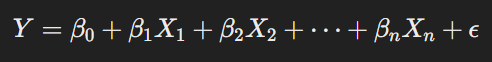



*   **Y** es la variable dependiente (lo que deseas predecir)

*   **X1, X2,...,Xn** son las variables independientes (predictorias)

*   **β0** es el peso para el bias o sesgo.

*   **β1, β2,...,βn** son coeficientes o pesos de las variables independientes.

Cada coeficiente o peso **βi** define que tanto afectará el valor de su **Xi** correspondiente en el calculo de **Y** .







El siguiente código se encarga de configurar el entorno del Colab. Se importan las librerías necesarias:

1. **os:** Se utiliza para manejar directorios y rutas en el sistema operativo. Esto es útil para navegar por carpetas, listar archivos, y crear rutas de manera dinámica.

2. **numpy as np:** numpy es una librería fundamental para la computación científica en Python. Se usa principalmente para trabajar con matrices y realizar cálculos matemáticos avanzados de manera eficiente.

3. **matplotlib.pyplot:** pyplot es una colección de funciones para crear gráficos, similar a cómo se haría en MATLAB. Es comúnmente utilizada para visualizar datos en gráficos 2D como líneas, barras, histogramas, etc.

4. **mpl_toolkits.mplot3d.Axes3D:** Este módulo es necesario para crear gráficos en 3D, como superficies o curvas tridimensionales.

```
%matplotlib inline
```
Es un magic command especifica de los cuadernos de Jupyter y Colab que permite mostrar gráficos directamente dentro del cuaderno, en lugar de abrir una ventana separada. Es especialmente útil para visualizar resultados mientras se trabaja en el cuaderno.

```
from google.colab import drive
drive.mount("/content/gdrive")
```
Esto permite acceder a los archivos de Google Drive

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



### Este código tiene como objetivo cargar un dataset en un DataFrame de pandas y seleccionar una muestra aleatoria de 200 filas.

Primero se importa la librería de pandas. Pandas es una librería fundamental en Python para la manipulación y análisis de datos. Es ampliamente utilizada para cargar, limpiar, analizar y visualizar datos en forma de tablas (DataFrames).

`pd.read_csv()` es una función de pandas que se utiliza para cargar archivos CSV. En este caso, está cargando un archivo CSV desde Google Drive.

`nrows=20000`: Este parámetro limita la carga a solo 20,000 filas, lo cual es útil si el archivo es muy grande y no se necesita procesar todos los datos.

***En este caso se quiso entrenar el modelo con todos los datos, que son mas de un millon, sin embargo, el costo fue muy alto por tantos datos recolectados y se necesitarian muchas mas iteraciones para disminuir J. Por esto solo se tomaron 20k datos, cumpliendo con el enunciado de más de 10k datos, 16k para entrenar el modelo y 4k para el testing, donde solo prediciremos 100 valores***

`dataframe.sample(n=200)` selecciona 200 filas aleatorias del DataFrame. Esto es útil para obtener una vista rápida de los datos sin necesidad de visualizar todo el dataset. El método .sample() toma como parámetro n, que indica cuántas filas se deben seleccionar de forma aleatoria.


In [ ]:
import pandas as pd
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
dataframe = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/measures_v2.csv', nrows=20000)
print(dataframe.sample(n=200))

             u_q    coolant  stator_winding        u_d  stator_tooth  \
2643   87.213066  19.317703       72.032425 -96.196648     57.415283   
5734   87.208603  18.576445       72.164459 -96.374748     58.365318   
18101  43.521351  19.008936       42.674328 -43.030277     34.543903   
8184   86.959404  18.828913       72.134712 -96.885078     58.507000   
2512   87.354904  19.398762       71.829773 -96.229706     56.994144   
...          ...        ...             ...        ...           ...   
17468  43.572151  18.886765       41.439560 -42.959194     33.788601   
1277   88.324005  19.307072       68.943764 -95.215790     53.517769   
1500   88.534584  17.878830       70.079987 -95.161064     54.810093   
2624   87.497406  19.384546       72.064445 -95.967628     57.408993   
1135   88.690552  19.328173       67.534737 -94.677277     52.758072   

       motor_speed         i_d         i_q         pm  stator_yoke    ambient  \
2643   4999.952637 -138.639725   53.369987  64.521912 

`dataframe.isnull():`

Este método de pandas devuelve un DataFrame del mismo tamaño que `dataframe`, pero con valores booleanos: True donde hay un valor nulo (NaN) y False donde no lo hay.

`.sum():`

Luego se aplica el método .sum() a este DataFrame de booleanos. En pandas, cuando aplicas .sum() a un DataFrame de valores booleanos, True se trata como 1 y False como 0.
Así que al hacer .sum(), obtienes la cantidad de valores nulos en cada columna.

In [ ]:
# Verificar que no tenga nulos
print(dataframe.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


####**Para crear el Mapa de Calor**

En este codigo se puede visualizar la correlacion entre las variables del dataset utilizando **un mapa de calor (heatmap)**.

`matplotlib.pyplot` es una librería de Python utilizada para crear gráficos.

`seaborn` es una librería de visualización basada en matplotlib, que facilita la creación de gráficos estadísticos más atractivos y fáciles de interpretar.

`dataframe.corr()` calcula la matriz de correlación entre las columnas del DataFrame. La correlación mide la relación entre dos variables:

* Valores cercanos a 1 indican una
correlación positiva fuerte (cuando una variable sube, la otra también).

* Valores cercanos a -1 indican una correlación negativa fuerte (cuando una variable sube, la otra baja).

* Valores cercanos a 0 indican poca o ninguna correlación.

`plt.figure(figsize=(10, 8))` define el tamaño de la figura (ancho y alto en pulgadas). Esto es útil para asegurar que el mapa de calor tenga el tamaño adecuado


`sns.heatmap(corr, annot=True, cmap='coolwarm')` rea el mapa de calor usando seaborn.
* **corr:** Es la matriz de correlación que generaste anteriormente.
* **annot=True:** Muestra los valores de correlación dentro de cada celda del mapa.
* **cmap='coolwarm':** Define el esquema de colores del mapa. Los colores fríos (azules) representan correlaciones negativas, mientras que los colores cálidos (rojos) representan correlaciones positivas.

`plt.show()` es necesario para mostrar el gráfico en la interfaz de Jupyter/Colab.

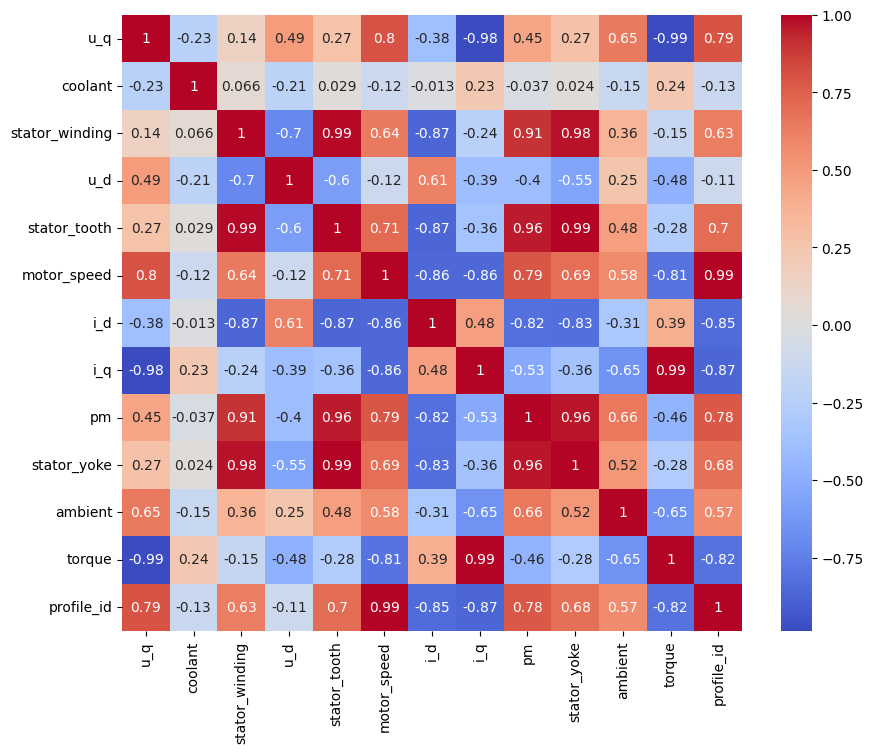

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Correlaciones entre las variables

**1. `pm` Varable dependiente**

 **Correlación positiva fuerte** con `stator_tooth` (0.96), `stator_yoke` (0.96) y `stator_winding` (0.91). Esto sugiere que la temperatura del imán permanente (pm) está fuertemente influenciada por las temperaturas del yugo, el diente y el bobinado del estator.

 **Correlación negativa moderada**

 Con `i_q` (-0.53) y `i_d` (-0.82). Esto indica que la corriente también tiene un impacto importante en la temperatura del imán permanente, aunque en sentido opuesto.

**2. Variables del Estator (stator_yoke, stator_tooth, stator_winding):**

  Estas tres variables están altamente correlacionadas entre sí (correlaciones cercanas a 1). Porque representan diferentes partes del estator, que normalmente experimentan un calentamiento similar.
  
**3. u_q y i_q:**

  Hay una fuerte correlación negativa entre u_q y i_q (-0.98). Cuando la componente q de la tensión aumenta, la componente q de la corriente tiende a disminuir.

**3. torque y u_q:**

  Existe una fuerte correlación negativa entre el torque y la componente q de la tensión (-0.99). Este comportamiento tiene que ver con la física de los motores eléctricos, donde el torque influye en la demanda de tensión.

# **Limpieza del Dataset**

Se elimina la columna de `profile_id` y se separan las caracteristicas (variables independientes) de la variable objetivo (variable dependiente).

* `dataframe.drop('profile_id', axis=1, inplace=True)` elimina la columna profile_id del DataFrame.

* `axis=1` indica que se está eliminando una columna (en lugar de una fila).

* `inplace=True` significa que el cambio se realiza directamente en el DataFrame original sin necesidad de reasignarlo a una nueva variable.

* `y = dataframe['pm']` Aquí se asigna la columna pm (la variable que se quiere predecir) a la variable y. Este es el target o label que usarás en tu modelo de aprendizaje automático.

* `X = dataframe.drop(columns=['pm'])`
Aquí se eliminan las columnas innecesarias (en este caso, pm) del DataFrame para obtener solo las características. X contiene todas las variables independientes que usarás para predecir pm.
`drop(columns=['pm'])` asegura que solo se elimine la columna específica pm, dejando las demás como características para el modelo.

* `X.head(`) muestra las primeras 5 filas de las variables independientes (características).
`y.head()` muestra las primeras 5 filas de la variable dependiente (pm).

*Al eliminar columnas que no son útiles o que pueden causar problemas (como profile_id), aseguro de que el modelo se entrene con las características más relevantes.*

In [ ]:
dataframe.drop('profile_id', axis=1, inplace=True)
y = dataframe['pm']
X = dataframe.drop(columns=['pm'])
print(X.head())
print(y.head())

        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q  stator_yoke    ambient    torque  
0  0.004419  0.000328    18.316547  19.850691  0.187101  
1  0.000606 -0.000785    18.314955  19.850672  0.245417  
2  0.001290  0.000386    18.326307  19.850657  0.176615  
3  0.000026  0.002046    18.330833  19.850647  0.238303  
4 -0.064317  0.037184    18.326662  19.850639  0.208197  
0    24.554214
1    24.538078
2    24.544693
3    24.554018
4    24.565397
Name: pm, dtype: float64


### **Dividir los datos de entrenamiento y conjunto de prueba**

**1. Importar función train_test_split**

`from sklearn.model_selection import train_test_split`

`train_test_split` es una función de scikit-learn que se utiliza para dividir los datos en dos (o más) subconjuntos de manera aleatoria. Es muy común usar esta función para crear un conjunto de entrenamiento y un conjunto de prueba.

**2. Division de los datos**

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
```
* X_train: Subconjunto de X (características) utilizado para entrenar el modelo.

* X_test: Subconjunto de X (características) utilizado para evaluar el modelo después de entrenarlo.

* y_train: Subconjunto de y (etiquetas o variable objetivo) correspondiente a X_train.

* y_test: Subconjunto de y correspondiente a X_test, usado para evaluar el rendimiento del modelo.

***test_size=0.2:*** Especifica que el 20% de los datos se reservarán para la prueba, mientras que el 80% se utilizará para el entrenamiento. Puedes ajustar este valor según tus necesidades.

***random_state=1:*** Controla la aleatoriedad de la división. Especificar un valor (por ejemplo, 1) asegura que la división sea reproducible; es decir, si ejecutas el código varias veces con el mismo random_state, obtendrás siempre la misma división.

In [ ]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

El siguiente bloque de codigo imprime la cantidad de datos para `X_train` y `y_train`, asi como almacenar el tamanio total de `y_train` en la variable `m`.

`len()` devuelve el numero de filas de X_train y y_train

In [ ]:
print(len(X_train))
print(len(y_train))
m = y_train.size
print(m)

16000
16000
16000


`X_train` y `y_train` convertidas en matrices de Numpy, convertir el DataFrame en una matriz numpy, ya que las operaciones matematicas de matrices se llevan mejor en Numpy.

In [ ]:
X_trainNp = X_train.values
y_trainNp = y_train.values

## **Normalizar las caracteristicas**

Hay que convertir todos los valores a una misma escala.

**1.** Primero se define la funcion `featureNormalize`, donde toma como argumento `X` que es un array Numpy.

**2.** Se crea una copia de los datos de `X` para evitar modificar los datos originales, esta copia se utilizara para almacenar los datos normalizados.

**3.** Se inicializa `mu` y `sigma` que son arrays que se inicializan en cero, y tendran un tamanio igual al de las caracteristicas X.

* `mu` almacenara la media de cada caracteristicas

* `sigma` almacenara la desviacion estandar de cada caracteristica

**4.** Calcular la Media y la desviacion estandar.
* `np.mean(X, axis = 0)` calcula la media de cada caracteristica (columna) a lo largo de todas las muestras (filas)
* `np.std(X, axis = 0)` calcula la desviacion estandar de cada caracteristica que se almacena en `sigma`
* La normalizacion se basa en restar la media y dividir por la desviacion estandar para cada caracteristica.

**5.** Se aplica la normalizacion:
`X_norm = (X - mu) / sigma`
* Se resta la media de cada característica (X - mu) para centrar los datos en 0.
* Luego, se divide por la desviación estándar (/ sigma) para escalar las características. Esto asegura que los valores estén en una escala comparable, generalmente entre -1 y 1.

**6.** Por ultimo se devuelven los resultados. `X_norm` son datos normalizados, `mu` la media de cada caracteristica y `sigma` la desviacion estandar de cada caracteristica.

In [ ]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Este codigo llama a la funcion *featureNormalize* para normalizar los datos de entrenamiento.

Luego se imprimen tanto los datos NO normalizados, la media de cada caracteristica, la desviacion estandar y los datos ya normalizados.

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_trainNp)

print(X_trainNp)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 86.90268707  19.18088341  72.12630463 ...  42.16268539  24.39452171
   48.5044136 ]
 [ 87.16599274  19.56009674  72.13750458 ...  42.64095306  24.0526619
   48.56375885]
 [ 87.16918945  19.13359642  72.12247467 ...  41.95851898  24.83279037
   48.74253082]
 ...
 [ 87.21678925  18.48980713  72.12172699 ...  41.81637192  23.70333099
   48.51808167]
 [131.16189575  19.27031326  49.74547958 ...  33.39403915  24.61961746
   -0.3958835 ]
 [ 90.33568573  19.00377655  39.83203888 ...  24.66321373  19.85062027
   48.57642746]]
Media calculada: [  94.59143365   18.95299848   56.53225972  -51.71128349   46.6856493
 4178.29345682 -103.6810816    49.82049796   35.31583895   23.58170758
   41.31961693]
Desviación estandar calculada: [3.23949988e+01 4.55323057e-01 1.32784118e+01 4.01590746e+01
 9.98112590e+00 1.61749044e+03 3.59918768e+01 4.78546509e+01
 5.80369458e+00 1.29927961e+00 3.80943529e+01]
[[-0.23734363  0.50049065  1.17439082 ...  1.17973928  0.62558831
   0.1886053 ]
 [-0.22921566  1.3

###**Aniadir columna de unos a X_norm (Sesgo - bias)**

**Aniadir columnas de unos**
* `np.ones((m, 1))`: Este comando crea un array de Numpy con forma (m, 1) donde m es el número de filas (o muestras) en tu conjunto de entrenamiento. Este array contiene solo unos.

* `m` se definio previamente como el tamanio de `y_traint`, por lo que se asegura de que haya un valor 1 para cada meustra de `X_norm`

* `X_norm:` Este es el array de Numpy que contiene tus características ya normalizadas. Lo obtuviste de la función featureNormalize.

* `np.concatenate([np.ones((m, 1)), X_norm], axis=1)`: Este comando concatena la columna de unos con X_norm a lo largo del eje 1 (las columnas). Como resultado, X_np tiene una primera columna llena de unos, seguida por las características normalizadas.


In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_np = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X_np)

[[ 1.         -0.23734363  0.50049065 ...  1.17973928  0.62558831
   0.1886053 ]
 [ 1.         -0.22921566  1.33333521 ...  1.26214673  0.36247341
   0.19016314]
 [ 1.         -0.22911698  0.39663694 ...  1.14456058  0.96290497
   0.19485602]
 ...
 [ 1.         -0.22764762 -1.01728068 ...  1.12006807  0.09360834
   0.18896409]
 [ 1.          1.12889222  0.69690033 ... -0.33113386  0.79883489
  -1.09505733]
 [ 1.         -0.13137052  0.11152098 ... -1.83549032 -2.87165848
   0.1904957 ]]


## **Cálculo del costo**

Se calcula el costo o error con la funcion de costo cuadrático, tambien conocida como "error cuadrático medio".{

**1.** Primero se define la funcion con tres argumentos.
* `X`: Matriz que contiene las caracteristicas de las muestras de entrenamiento, incluyendo la columna de unos)

* `y`: Un vector con los valores reales de las etiquetas correspondientes a cada muestra.

* `theta`: Un vector que contiene los parametros (pesos) del modelo, uncluyendo el termino bias.

**2.** Inicializacion de Variables Utiles.

* `m = y.shape[0]`: Calcula el número de ejemplos en el conjunto de entrenamiento, que se almacena en m. Esto se usa para normalizar el costo, dividiendo la suma de errores por la cantidad de ejemplos.

* `J = 0`: Inicializa la variable J, que almacenará el valor del costo.

**3.** Calcular el Costo (J).

* `np.dot(X, theta)`: Calcula las predicciones del modelo multiplicando la matriz X por el vector de parámetros theta.

* `np.dot(X, theta) - y`: Calcula el error de las predicciones restando los valores reales (y) de las predicciones.

* `np.square(...)`: Eleva al cuadrado el error para asegurarse de que sea positivo y penalizar errores grandes de manera más significativa.

* `np.sum(...)`: Suma todos los errores cuadráticos.

* `(1/(2 * m)) * ...`: Calcula el costo promedio. El factor de se utiliza para simplificar la derivada en el cálculo del gradiente.

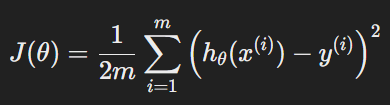

La función retorna el valor de **J**, que representa el costo total para los parámetros actuales de theta. Este valor se utilizará en el proceso de optimización (como descenso por gradiente) para ajustar los parámetros y minimizar el costo.


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

### **Descenso por gradiente**

Para ajustar los parametros theta.

**1.** Defino la funcion y los parametros de entrada. Tomando cinco argumentos:

* `X`: La matriz de caracteristicas
* `y`: El vector de valores objetivos (etiquetas)
* `theta` El vector de parametros que se ajustaran durante el entrenamiento
* `alpha`: La tasa de aprendizaje que controla la magnitud del ajuste de theta en cada iteracion
* `num_iters`: El numero de interaciones que realizara el algoritmo para ajustar los parametros

**2.** Inicializacion de variables

* `m = y.shape[0]`: Calcula el numero de ejemplos de entrenamiento

* `theta = theta.copy()`: Se realiza una copia de `theta` para no modificar el vector original en caso de que se necesite mas adelante.

* `J_history = []`: Inicializa unalista vacia que almacenara el costo en cada iteracion del algoritmo. Esto es util para visualizar como disminuye el costo con el tiempo.

**3.** *Bucle de Iteraciones para el Descenso por gradiente.*

`for i in range(num_iters)`: El bucle se ejecuta num_iters veces, lo que significa que se actualizarán los valores de theta en cada iteración.

**Actualizacion de `theta`**

* `np.dot(X, theta)`: Calcula las predicciones actuales del modelo

* `np,dot(X, theta) - y`: Calcula el error entre las predicciones y los valores reales

* `(np.dot(X, theta) - y).dot(X)`: Calcula el gradiente, que es la direccion en la que se debe ajustar `theta` para minimizar el costo.

* `alpha / m`: Controla la magnitud del ajuste. El factor *m* asegura que el promedio de los ajustes se tenga en cuenta.

* `theta = theta - ...`: Actualiza los valores de `theta` en la direccion opuesta al gradiente para minimizar el costo.

**4.** Almacenar el Costo en cada iteracion.

* Después de actualizar theta, se calcula el nuevo costo con la función computeCostMulti y se almacena en J_history. Esto permite rastrear cómo disminuye el costo a lo largo de las iteraciones.

**5.** Por ultimo se retorna los valores de theta y J_history.

*El algoritmo de descenso por gradiente ajusta los parámetros theta iterativamente para minimizar el costo. En cada iteración, los parámetros se ajustan en la dirección que reduce el costo más rápidamente (esto se determina mediante el gradiente). La tasa de aprendizaje (alpha) controla el tamaño de los pasos en cada iteración.*

*El objetivo final es encontrar los valores óptimos de theta que minimicen la función de costo, lo que debería dar como resultado un modelo que predice con mayor precisión.*

1. Inicialmente, theta puede ser un vector de ceros o valores aleatorios.

2. En cada iteración, el gradiente indica la dirección en la que se deben ajustar los parámetros para disminuir el costo.

3. Este proceso se repite hasta que se alcanza un mínimo (idealmente el mínimo global) o hasta que se completa el número máximo de iteraciones.

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

##**Entrenamimento del modelo de Regresion Lineal Multiple**

**1.** Eleccion del valor de `alpha` y `num_iters`

* `alpha`: Es la tasa de aprendizaje. Este valor controla la magnitud de los pasos que tomará el descenso por gradiente en cada iteración. Es importante experimentar con diferentes valores de alpha para encontrar un valor que haga que el algoritmo converja eficientemente (ni muy rápido ni muy lento).

* `num_iters`: Es el número de iteraciones que el descenso por gradiente ejecutará.

**2.** Inicializacion de theta y ejecucion del descenso por gradiente.

* `theta = np.zeros(12)`: Inicializa el vector de parámetros theta con ceros. Como tienes 11 características (más la columna de unos para el término de intersección), theta tiene un tamaño de 12.

* `gradientDescentMulti(X_np, y_trainNp, theta, alpha, num_iters)`: Ejecuta el algoritmo de descenso por gradiente usando las características normalizadas (X_np), las etiquetas (y_trainNp), y los hiperparámetros definidos (alpha y num_iters).

**3.** Graficar la convergencia del costo. Esta parte del código grafica cómo disminuye el costo a lo largo de las iteraciones.

* `np.arange(len(J_history))` genera un array de índices para cada iteración.

**4.** Mostrar los resultados finales de `theta`. Después de que el descenso por gradiente termina, se imprimen los valores finales de theta. Estos son los parámetros optimizados que el modelo usará para realizar predicciones.



theta calculado por el descenso por el gradiente: [53.90696376 -0.11215744 -0.12941274  2.4427715  -0.175691    3.66772476
  0.3571361   0.19933897 -0.82171769  4.33086508  2.48090287 -0.79926978]


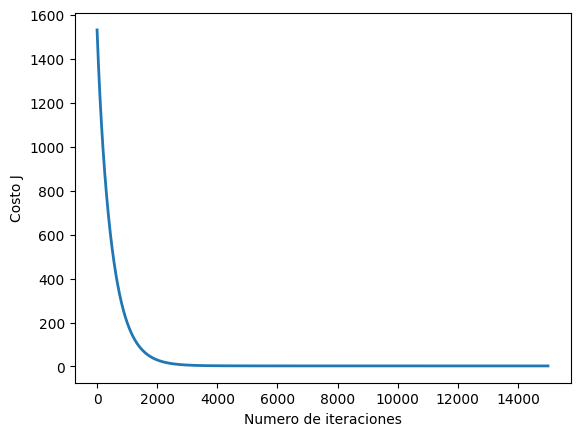

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 15000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X_np, y_trainNp, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

En este caso, J_history almacena los valores de la función de costo para cada iteración del descenso por gradiente. El valor final de J_history (es decir, J_history[-1]) representa el costo después de la última iteración, lo cual debería ser el costo con el que se quedó el modelo.

El costo final te da una idea de la calidad del ajuste del modelo. Si el costo es bajo, significa que el modelo ha minimizado los errores de predicción, lo cual es deseable. Si es alto, podría ser necesario ajustar los hiperparámetros

In [ ]:
print(f"con un costo de: { J_history[-1]} ")

con un costo de: 2.3645547156741595 


Este fragmento de código convierte los conjuntos de prueba `X_test` y `y_test` en arrays de Numpy.

In [ ]:
X_testNp = X_test.values
y_testNp = y_test.values

## **PREDICCIONES**

Realizo 100 predicciones de los primeros 100 datos de prueba en un modelo de regresion lineal multiple.

**1.** Seleccionar los primeros 100 datos de prueba

* `X_test.values[:100]` selecciona las primeras 100 filas de las características de prueba (X_test) y las convierte en un array de Numpy.

* `y_test.values[:100]` selecciona los primeros 100 valores de la variable dependiente (y_test), que serán utilizados para comparar las predicciones.

**2.** Agregar el termino bias a X_testNp

* `np.ones(X_test.Np.shape[0], 1)` crea una columna de unos con tantas filas como tenga X_testNp. Es importante para calcular tita sub cero.

* `np.concatenate([...], axis=1)` agrega esta columna de unos al principio de X_testNp. La nueva estructura de X_testNp tiene una primera columna llena de unos, seguida de las características originales.

**3.** Normalizar las caracteristicas, excepto el bias.

* `X_testNp[:,1]` selecciona todas las columnas excepto la primera (el bias), ya que esa columna no necesita ser normalizada.

* `(X_testNp[:, 1:] - mu) / sigma` normaliza las caracteristicas utilizando la media (mu) y la desviacion estandar (sigma) calculadas previamente durante el entrenamiento.

**4.** Realizar las predicciones usando `np.dot`

* `np.dot(X_testNp, theta)` realiza el producto punto entre las características normalizadas (X_testNp) y el vector de parámetros (theta). El resultado es un vector de predicciones para los 100 datos de prueba.

**5.** Imprimir las predicciones junto con los valores reales.

* Este bucle recorre simultáneamente las predicciones y los valores reales utilizando zip.

* `enumerate()` se utiliza para numerar cada predicción.

* `f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}'` formatea la salida redondeando las predicciones y los valores reales a enteros con :.0f.

*Asi evaluo el rendimiento del modelo comparando las predicciones generadas para los primeros 100 datos de prueba con sus valores reales.*





In [ ]:
# Seleccionar los primeros 100 datos de prueba
X_testNp = X_test.values[:100]  # Tomar los primeros 100 datos
y_testNp = y_test.values[:100]  # Tomar los primeros 100 valores reales

# Agregar el término bias (la columna de 1s) a X_testNp
X_testNp = np.concatenate([np.ones((X_testNp.shape[0], 1)), X_testNp], axis=1)

# Normalizar las características (excepto el término de bias)
X_testNp[:, 1:] = (X_testNp[:, 1:] - mu) / sigma

# Realizar las predicciones usando np.dot
predicciones = np.dot(X_testNp, theta)

# Imprimir las predicciones junto con los valores reales
for i, (prediccion, real) in enumerate(zip(predicciones, y_testNp)):
    print(f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}')

Predicción 1: 55 - Valor Real: 53
Predicción 2: 29 - Valor Real: 29
Predicción 3: 65 - Valor Real: 66
Predicción 4: 36 - Valor Real: 37
Predicción 5: 59 - Valor Real: 58
Predicción 6: 54 - Valor Real: 53
Predicción 7: 52 - Valor Real: 52
Predicción 8: 52 - Valor Real: 52
Predicción 9: 56 - Valor Real: 58
Predicción 10: 69 - Valor Real: 69
Predicción 11: 65 - Valor Real: 67
Predicción 12: 32 - Valor Real: 33
Predicción 13: 67 - Valor Real: 69
Predicción 14: 67 - Valor Real: 68
Predicción 15: 52 - Valor Real: 52
Predicción 16: 63 - Valor Real: 63
Predicción 17: 67 - Valor Real: 69
Predicción 18: 23 - Valor Real: 27
Predicción 19: 53 - Valor Real: 56
Predicción 20: 41 - Valor Real: 38
Predicción 21: 67 - Valor Real: 69
Predicción 22: 67 - Valor Real: 69
Predicción 23: 66 - Valor Real: 68
Predicción 24: 68 - Valor Real: 69
Predicción 25: 69 - Valor Real: 69
Predicción 26: 53 - Valor Real: 54
Predicción 27: 66 - Valor Real: 67
Predicción 28: 69 - Valor Real: 69
Predicción 29: 66 - Valor Rea

#**ECUACION DE LA NORMAL**

**1.** Defino la funcion `normalEqn`

* tiene dos argumentos, X que es la matriz de caracteristicas que incluye la columna de unos y `y` el vector de las etiquetas.

**2.** Inicializacion de `theta`
* Se inicializa theta como un vector de ceros con la misma longitud que el número de columnas en X.

**3.** Calculo de `theta` usando la ecuacion de la normal

Implemento la ecuacion de la normal.
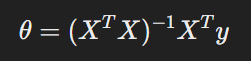

* `X.T:` Calcula la transpuesta de la matriz *X*

* `np.dot(X.T, X)` Multiplica X transpuesta por X, dando como resultado una matriz cuadrada

* `np.linalg.inv(...)` Calcula la inversa de la matriz XT X. Esta es la parte mas costosa computacionalmente.

* `np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)`: Multiplica la inversa de XT X por XT

* `np.dot(..., y)` Finalmente multiplica el resultado anterior por `y` para obtener el vector theta.

**4.** La función retorna los valores de theta, que son los parámetros óptimos para el modelo de regresión lineal

*La ecuación de la normal permite encontrar directamente los parámetros
θ que mejor ajustan el modelo sin necesidad de iteraciones, como sucede en el descenso por gradiente. El cálculo se realiza en una sola operación, lo que es conveniente para datasets pequeños o medianos.*



In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

Calculamos el costo con las thetas obtenidas...

In [ ]:
def computeCost(X, y, theta):
    m = len(y)
    predicciones = X.dot(theta)
    error = predicciones - y
    costo = (1 / (2 * m)) * np.dot(error.T, error)
    return costo

In [ ]:
X_trainNp_EcNormal = X_train.values
y_trainNp_EcNormal = y_train.values

X_testNp_EcNormal = X_test.values[:100]  # Tomar los primeros 100 datos
y_testnNp_EcNormal = y_test.values[:100]  # Tomar los primeros 100 valores reales

### **Utilizar ecuacion de la normal**

**1.** Calcular los parametros usando la ecuacion de la normal

```
# np.concatenate([np.ones((m, 1)), X_trainNp_EcNormal], axis=1)
```

* Esta línea añade una columna de unos al conjunto de entrenamiento `X_trainNp_EcNormal`, lo cual es necesario para incluir el término de intersección
θ sub cero en la ecuación.

* `m` es el numero de muestras en el conjunto de entrenamiento

* `axis = 1` indica que la concatenacion es en las columnas

```
# theta_EcNormal = normalEqn(X_np_EcNormal, y_trainNp_EcNormal)
```

* Calcula los valores de theta usando la ecuacion de la normal.

**2.** Calcular el costo para los valores de theta obtenidos.

```
# computeCost(X_np_EcNormal, y_trainNp_EcNormal, theta_EcNormal)
```
Esta función calcula el costo asociado con los valores de θ obtenidos usando la ecuación de la normal. La funcion evalua que tan bien se ajusta el modelo a los datos de entrenamiento.

**3.** Luego se imprime el costo calculado con 4 decimales

**4.** Y luego se muestran los parametros calculados de theta usando la Ec. de la Normal.




In [ ]:
# Calcula los parametros con la ecuación de la normal
X_np_EcNormal = np.concatenate([np.ones((m, 1)), X_trainNp_EcNormal], axis=1)
theta_EcNormal = normalEqn(X_np_EcNormal, y_trainNp_EcNormal);

# Calcular el costo para los valores de theta obtenidos
costo_EcNormal = computeCost(X_np_EcNormal, y_trainNp_EcNormal, theta_EcNormal)

# Imprimir el valor del costo
print(f'El costo calculado con la ecuación normal es: {costo_EcNormal:.4f}')

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

El costo calculado con la ecuación normal es: 0.8530
Theta calculado a partir de la ecuación de la normal: [53.90696376 -0.11215744 -0.12941274  2.4427715  -0.175691    3.66772476
  0.3571361   0.19933897 -0.82171769  4.33086508  2.48090287 -0.79926978]


### **Predicciones usando los parametros de theta calculados con el Ec. de la Normal**

**1.** Se agrega el termino Bias a `X_testNp_EcNormal`

* `np.ones((X_testNp.shape[0], 1))`: Crea una columna de unos con la misma cantidad de filas que tiene X_testNp.

* `np.concatenate([...], axis=1)`: Añade esta columna de unos a X_testNp_EcNormal, formando la matriz completa para hacer las predicciones.

**2.** Realiza las predicciones usando `np.dot`

* `np.dot(X_testNp_EcNormal_, theta_EcNormal)`: Realiza el producto punto entre la matriz de características de prueba (que incluye la columna de unos) y el vector de parámetros θ calculado con la ecuación de la normal.

**3.** Se imprimen las predicciones junto con los valores reales.

* `zip(predicciones_EcNormal, y_testnNp_EcNormal)`: Combina las predicciones y los valores reales en pares.

* `enumerate()`: Añade un índice a cada par para numerar las predicciones.

* `f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}'`: Formatea la salida redondeando las predicciones y los valores reales a enteros con :.0f.



In [ ]:
# Normalizar las características (excepto el término de bias)
#X_testNp[:, 1:] = (X_testNp[:, 1:] - mu) / sigma
# Agregar el término bias (la columna de 1s) a X_testNp_EcNormal_
X_testNp_EcNormal_ = np.concatenate([np.ones((X_testNp.shape[0], 1)), X_testNp_EcNormal], axis=1)

# Realizar las predicciones usando np.dot
predicciones_EcNormal = np.dot(X_testNp_EcNormal_, theta_EcNormal)

# Imprimir las predicciones junto con los valores reales
for i, (prediccion, real) in enumerate(zip(predicciones_EcNormal, y_testnNp_EcNormal)):
    print(f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}')

Predicción 1: 54 - Valor Real: 53
Predicción 2: 31 - Valor Real: 29
Predicción 3: 66 - Valor Real: 66
Predicción 4: 36 - Valor Real: 37
Predicción 5: 59 - Valor Real: 58
Predicción 6: 54 - Valor Real: 53
Predicción 7: 51 - Valor Real: 52
Predicción 8: 52 - Valor Real: 52
Predicción 9: 56 - Valor Real: 58
Predicción 10: 68 - Valor Real: 69
Predicción 11: 66 - Valor Real: 67
Predicción 12: 34 - Valor Real: 33
Predicción 13: 69 - Valor Real: 69
Predicción 14: 67 - Valor Real: 68
Predicción 15: 53 - Valor Real: 52
Predicción 16: 63 - Valor Real: 63
Predicción 17: 68 - Valor Real: 69
Predicción 18: 25 - Valor Real: 27
Predicción 19: 56 - Valor Real: 56
Predicción 20: 37 - Valor Real: 38
Predicción 21: 70 - Valor Real: 69
Predicción 22: 70 - Valor Real: 69
Predicción 23: 66 - Valor Real: 68
Predicción 24: 71 - Valor Real: 69
Predicción 25: 69 - Valor Real: 69
Predicción 26: 53 - Valor Real: 54
Predicción 27: 66 - Valor Real: 67
Predicción 28: 70 - Valor Real: 69
Predicción 29: 67 - Valor Rea

# **REGRESIÓN POLINÓMICA**
En la regresión polinómica, se transforman las características originales en términos polinómicos (elevadas a distintas potencias) para modelar relaciones más complejas.
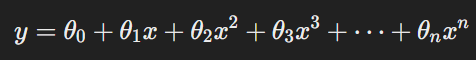

Y para multiples variables:
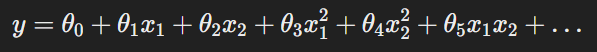



Primero preparo los datos en nuevas variables para este modelo.

In [ ]:
x_trainNp_RegPol = X_train.values
y_trainNp_RegPol = y_train.values
x_testNp_RegPol = X_test.values[:100]  # Tomar los primeros 100 datos
y_testNp_RegPol = y_test.values[:100]  # Tomar los primeros 100 valores reales

### **Visualizacion de la relacion de algunas caracteristicas con la variable dependiente pm**

Primero defino la funcion de `plotData(X, y)`

* `pyplot.figure()` abre una nueva figura en la que se hara la grafica
* `pyplot.plot(x, y, 'ro', ms = 10, mec = 'k')`

  `ro` significa que los puntos se dibujaran en rojo ('r') y con circulos ('o')

  `ms = 10` es el tamanio de los marcadores

  `mec = 'k'` Color del borde del marcador (negro)

* `pyplot.ylabel('pm')`: Establece la etiqueta del eje y como *pm*, que es la variable dependiente

* `pyplot.xlabel('caracteristicas')`: Establece la etiqueta del eje x como 'caracteristicas', ya que es donde se grafican las variables independientes.

Luego grafico diferentes caracteristicas contra *pm*

**Los datasets con muchas columnas, tiene muchas dimensiones (caracteristicas), son dificiles de visualizar las relaciones graficas entre todas las variables. Cada grafica 2D solo puede representar una caraceristica contra la variable dependiente. Sin embargo, en un contexto multivariable, las interacciones entre varias características a la vez son importantes, y estas no se pueden capturar en una simple gráfica 2D.**



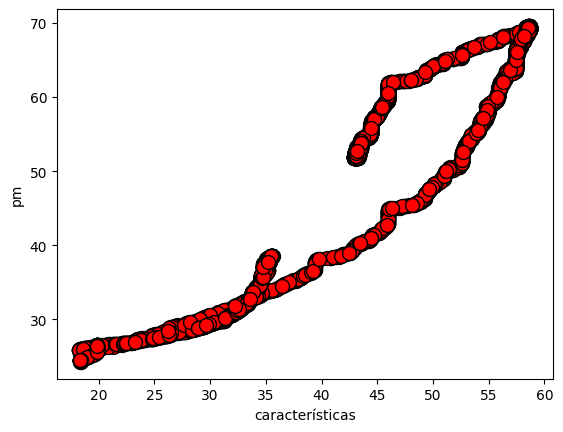

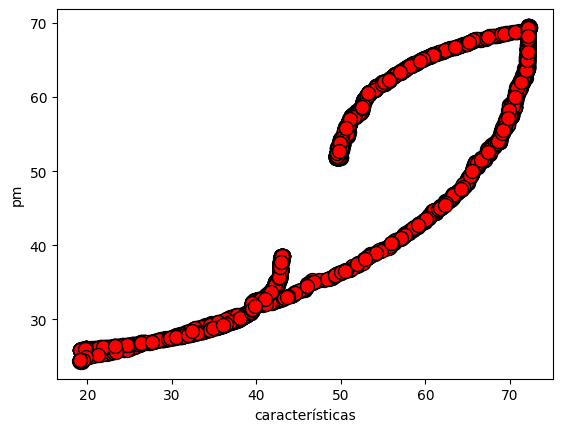

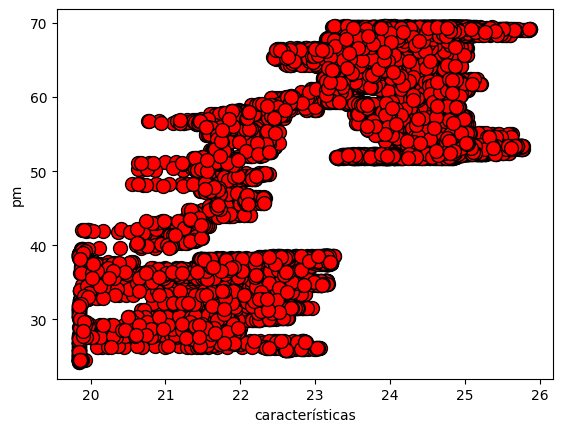

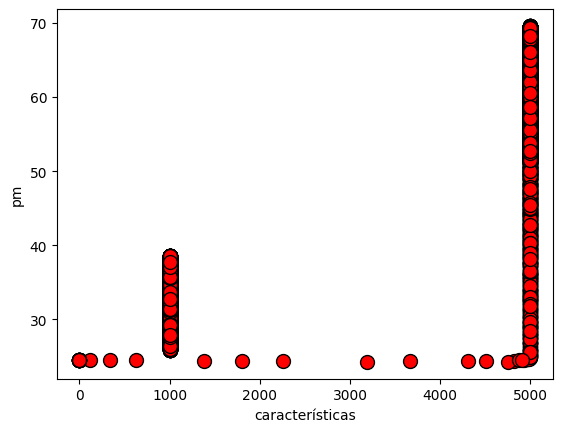

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('pm')
    pyplot.xlabel('características')

plotData(x_trainNp_RegPol[:,4:5], y_trainNp_RegPol)
plotData(x_trainNp_RegPol[:,2:3], y_trainNp_RegPol)
plotData(x_trainNp_RegPol[:,9:10], y_trainNp_RegPol)
plotData(x_trainNp_RegPol[:,5:6], y_trainNp_RegPol)

# Al ser tantas dimensiones no se puede analizar de manera grafica la distribucion de variables, se podria solo una columna x

##**Extender las caracteristicas originales agregando terminos polinomicos de segundo grado (cuadrados) al conjunto de datos**

**1.** Multiplico las caracteristicas por si mismas. Representando las caracteristicas elevadas al cuadrado.

**2.** Concatenar las caracteristicas originales con los terminos cuadrados.

**3.** El resultado de la concatenación se asigna a `x_trainNp_RegPol_Cuadrado`, que ahora contiene tanto las características originales como sus versiones elevadas al cuadrado.

*Agregar términos polinómicos permite al modelo capturar relaciones no lineales entre las características y la variable objetivo. En una regresión polinómica, esto es esencial para ajustar una curva más compleja, en lugar de una simple línea recta.*

In [ ]:
x_trainNp_RegPol_Cuadrado = np.concatenate([x_trainNp_RegPol, x_trainNp_RegPol * x_trainNp_RegPol], axis=1)

Imprimir la matriz completa con todas las características. Dado que se ha concatenado las características originales con sus términos cuadrados, esta matriz tendrá el doble de columnas que la matriz original.

`x_trainNp_RegPol_Cuadrado.shape` devuelve una tupla con dos valores: el número de filas y el número de columnas de la matriz.

Estas líneas imprimen la cantidad de filas y columnas en la matriz. Esto es útil para verificar que las operaciones de concatenación y transformación se realizaron correctamente.

In [ ]:
print(x_trainNp_RegPol_Cuadrado)
num_filas, num_columnas = x_trainNp_RegPol_Cuadrado.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

[[8.69026871e+01 1.91808834e+01 7.21263046e+01 ... 1.77769204e+03
  5.95092690e+02 2.35267814e+03]
 [8.71659927e+01 1.95600967e+01 7.21375046e+01 ... 1.81825088e+03
  5.78530544e+02 2.35843867e+03]
 [8.71691895e+01 1.91335964e+01 7.21224747e+01 ... 1.76051732e+03
  6.16667478e+02 2.37583431e+03]
 ...
 [8.72167892e+01 1.84898071e+01 7.21217270e+01 ... 1.74860896e+03
  5.61847900e+02 2.35400425e+03]
 [1.31161896e+02 1.92703133e+01 4.97454796e+01 ... 1.11516185e+03
  6.06125564e+02 1.56723746e-01]
 [9.03356857e+01 1.90037766e+01 3.98320389e+01 ... 6.08274111e+02
  3.94047125e+02 2.35966930e+03]]
Número de filas: 16000
Número de columnas: 22


`featureNormalize` se utiliza para normalizar las características de un conjunto de datos

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

En este caso se normaliza el conjunto de datos y se imprimen primero las caracteristicas originales, luego se imprime la media y a desviacion estandar de cada caracteristica y finalmente se imprimen los datos normalizados.

*Después de la normalización, las características deberían tener una media cercana a 0 y una desviación estándar cercana a 1.*

In [ ]:
# llama featureNormalize con los datos cargados
X_norm_RegPol, mu, sigma = featureNormalize(x_trainNp_RegPol_Cuadrado)

print(x_trainNp_RegPol_Cuadrado)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm_RegPol)

[[8.69026871e+01 1.91808834e+01 7.21263046e+01 ... 1.77769204e+03
  5.95092690e+02 2.35267814e+03]
 [8.71659927e+01 1.95600967e+01 7.21375046e+01 ... 1.81825088e+03
  5.78530544e+02 2.35843867e+03]
 [8.71691895e+01 1.91335964e+01 7.21224747e+01 ... 1.76051732e+03
  6.16667478e+02 2.37583431e+03]
 ...
 [8.72167892e+01 1.84898071e+01 7.21217270e+01 ... 1.74860896e+03
  5.61847900e+02 2.35400425e+03]
 [1.31161896e+02 1.92703133e+01 4.97454796e+01 ... 1.11516185e+03
  6.06125564e+02 1.56723746e-01]
 [9.03356857e+01 1.90037766e+01 3.98320389e+01 ... 6.08274111e+02
  3.94047125e+02 2.35966930e+03]]
Media calculada: [ 9.45914336e+01  1.89529985e+01  5.65322597e+01 -5.17112835e+01
  4.66856493e+01  4.17829346e+03 -1.03681082e+02  4.98204980e+01
  3.53158389e+01  2.35817076e+01  4.13196169e+01  9.99697527e+03
  3.59423470e+02  3.37221261e+03  4.28680811e+03  2.27917272e+03
  2.00744115e+07  1.20451819e+04  4.77214963e+03  1.28089135e+03
  5.57785060e+02  3.15849047e+03]
Desviación estandar calc

Agrego una columna de unos, que es el termino bias, a las caracteristicas normalizadas y luego imprimo la matriz resultante.

In [ ]:
X_trainNp_nor_ses_RegPol = np.concatenate([np.ones((m, 1)), X_norm_RegPol], axis=1)
print(X_trainNp_nor_ses_RegPol)

[[ 1.         -0.23734363  0.50049065 ...  1.25566425  0.622208
  -0.20545065]
 [ 1.         -0.22921566  1.33333521 ...  1.35817676  0.34598838
  -0.20398194]
 [ 1.         -0.22911698  0.39663694 ...  1.21225512  0.98202732
  -0.19954674]
 ...
 [ 1.         -0.22764762 -1.01728068 ...  1.18215674  0.06775911
  -0.20511255]
 [ 1.          1.12889222  0.69690033 ... -0.41888148  0.80621173
  -0.80525169]
 [ 1.         -0.13137052  0.11152098 ... -1.70004077 -2.73078333
  -0.20366818]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [ ]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

`X_trainNp_nor_ses_RegPol.shape` devuelve una tupla con dos valores: el número de filas y el número de columnas de la matriz.

* 1 columna de unos para el término de intersección.
* 11 columnas originales.
* 11 columnas adicionales para los términos cuadráticos.


In [ ]:
num_filas, num_columnas = X_trainNp_nor_ses_RegPol.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 16000
Número de columnas: 23


## **Entrenamiento de regresion polinomica**

**1.** Elijo el valor de alpha y num_iters.

* `alpha` es la tasa de aprendizaje. Este valor controla qué tan grandes son los pasos que el algoritmo toma para ajustar los parámetros θ. Valores más bajos hacen que el algoritmo converja más lentamente, pero pueden ser más precisos.

* `num_iters` Es el número de iteraciones que el descenso por gradiente ejecutará.

**2.** Inicializo theta y ejecuto el descenso por gradiente.

* `theta_RegPol = np.zeros(23)`: Inicializa un vector de ceros con tamaño 23. Esto es porque tienes 22 características (después de agregar los términos polinómicos) más una columna de unos para el término bias.

* `gradientDescentPoly(X_trainNp_nor_ses_RegPol, y_trainNp_RegPol, theta_RegPol, alpha, num_iters)`: Ejecuta el algoritmo de descenso por gradiente usando las características normalizadas y los valores objetivo (`y_trainNp_RegPol`).

**3.** Graficamos la convergencia del costo y mostrar las resultados finales de theta

theta calculado por el descenso por el gradiente: [53.90696376 -0.11215744 -0.12941274  2.4427715  -0.175691    3.66772476
  0.3571361   0.19933897 -0.82171769  4.33086508  2.48090287 -0.79926978]


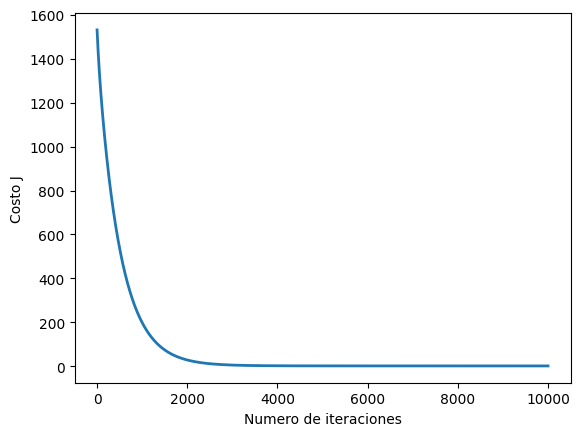

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta_RegPol = np.zeros(23)
theta_RegPol, J_history_RegPol = gradientDescentPoly(X_trainNp_nor_ses_RegPol, y_trainNp_RegPol, theta_RegPol, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history_RegPol)), J_history_RegPol, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

El valor final de `J_history_RegPol` (es decir,` J_history_RegPol[-1]`) representa el costo después de la última iteración, lo cual debería ser el costo mínimo alcanzado por el modelo.

In [ ]:
print(f"con un costo de: { J_history_RegPol[-1]} ")

con un costo de: 1.6951312238607206 


## **Prediccion de regresion polinomica**

**1.** Este paso crea nuevos términos polinómicos (cuadráticos) para los datos de prueba, tal como lo hice con los datos de entrenamiento. Cada característica en `x_testNp_RegPol` se multiplica por sí misma, generando x**2 para cada característica original. Y tambien concatena las características originales con sus versiones elevadas al cuadrado, formando una matriz que contiene tanto los términos originales como los cuadráticos.

**2.** Normalizacion de los datos de prueba. Aquí se normalizan los datos de prueba utilizando la media (mu) y la desviación estándar (sigma) calculadas previamente con los datos de entrenamiento. Es crucial usar los valores de mu y sigma del entrenamiento para asegurar que la normalización sea consistente.

**3.** Agrego el termino bias a los datos normalizados.

**4.** Realizo las predicciones, multiplicando la matriz de caracteristicas normalizadas por el vector de parametros theta. Asi generando un vector de predicciones.

**5.** Imprimo las predicciones junto con los valores reales. Este bucle recorre las predicciones y los valores reales, mostrando ambos para comparación.



In [ ]:
# Paso 1: Expansión polinomial para x_testNp_RegPol (agregar términos al cuadrado)
x_testNp_RegPol_Cuadrado = np.concatenate([x_testNp_RegPol, x_testNp_RegPol * x_testNp_RegPol], axis=1)

# Paso 2: Normalización de los datos de prueba usando mu y sigma calculados en los datos de entrenamiento
x_testNp_RegPol_Cuadrado_norm = (x_testNp_RegPol_Cuadrado - mu) / sigma

# Paso 3: Agregar el término bias (columna de 1s) a los datos normalizados
X_testNp_nor_ses_RegPol = np.concatenate([np.ones((x_testNp_RegPol_Cuadrado_norm.shape[0], 1)), x_testNp_RegPol_Cuadrado_norm], axis=1)

# Paso 4: Realizar las predicciones
predicciones_RegPol = np.dot(X_testNp_nor_ses_RegPol, theta_RegPol)

# Paso 5: Imprimir las predicciones junto con los valores reales
for i, (prediccion, real) in enumerate(zip(predicciones_RegPol, y_testNp_RegPol)):
    print(f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}')

Predicción 1: 54 - Valor Real: 53
Predicción 2: 29 - Valor Real: 29
Predicción 3: 65 - Valor Real: 66
Predicción 4: 36 - Valor Real: 37
Predicción 5: 58 - Valor Real: 58
Predicción 6: 54 - Valor Real: 53
Predicción 7: 52 - Valor Real: 52
Predicción 8: 52 - Valor Real: 52
Predicción 9: 56 - Valor Real: 58
Predicción 10: 69 - Valor Real: 69
Predicción 11: 65 - Valor Real: 67
Predicción 12: 32 - Valor Real: 33
Predicción 13: 67 - Valor Real: 69
Predicción 14: 66 - Valor Real: 68
Predicción 15: 51 - Valor Real: 52
Predicción 16: 63 - Valor Real: 63
Predicción 17: 66 - Valor Real: 69
Predicción 18: 24 - Valor Real: 27
Predicción 19: 53 - Valor Real: 56
Predicción 20: 39 - Valor Real: 38
Predicción 21: 67 - Valor Real: 69
Predicción 22: 67 - Valor Real: 69
Predicción 23: 66 - Valor Real: 68
Predicción 24: 68 - Valor Real: 69
Predicción 25: 69 - Valor Real: 69
Predicción 26: 53 - Valor Real: 54
Predicción 27: 66 - Valor Real: 67
Predicción 28: 69 - Valor Real: 69
Predicción 29: 66 - Valor Rea